# Evaluating Home Field Advantage During the 2018 Regular Season

## Import packages and config

In [2]:
import pandas as pd

import numpy as np

import scipy.stats as stats

import mysql.connector

import config

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('darkgrid')

ModuleNotFoundError: No module named 'config'

## Connect to database

In [26]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.password,
    database = 'sports'
)
cursor = cnx.cursor(buffered=True)

## Define Functions

In [3]:
# Creates the 'home_pt_diff' column
def home_pt_diff(df):
    df['home_pt_diff'] = df['home_team_score'] - df['away_team_score']
    return df['home_pt_diff']

# Returns a list of the actual home_pt_diffs per game
def get_Actuals(df):
    actuals = [df.iloc[i] for i in range(df.shape[0])]
    return actuals

# Returns a list of z-scores
def get_Zscores(df):
    mu = df.mean()
    sigma = df.std()
    z_scores = [(df.iloc[i]-mu)/sigma for i in range(df.shape[0])]
    return z_scores

# Returns a list of list. Each list in the list is a sample of size 'size'. The length of the list of lists is 'r'
def create_Samples(data_list, size, r):
    samples = [np.random.choice(data_list, replace=False, size=size) for i in range(r)]
    return samples

# Returns a list of sample means
def get_SampleMeans(random_sample):
    sample_means = [np.mean(i) for i in random_sample]
    return sample_means

# Returns a list of graph data
def generate_graph_data(df):
    graph_data = []
    actual_data = get_Actuals(df)
    z_scores = get_Zscores(df)
    actual_data_samples = create_Samples(actual_data)
    actual_data_sample_means = get_SampleMeans(actual_data_samples)
    graph_data.append([actual_data, z_scores, actual_data_samples, actual_data_sample_means])
    return graph_data

## Football

Query MySQL for data and create dataframes

In [27]:
cursor.execute("""
SELECT
    *
FROM
    sports.nfl
;
""")

nfl_data = cursor.fetchall()

columns = [
    'game_id',
    'month',
    'week',
    'away_team',
    'away_team_score',
    'home_team',
    'home_team_score',
    'away_team_moneyline',
    'home_team_moneyline',
    'spread'
]

nfl_df = pd.DataFrame(nfl_data,columns=columns).set_index('game_id')


nfl_df['home_pt_diff'] = 0 # create dummy values for a new column
nfl_df['home_pt_diff'] = nfl_df.apply(home_pt_diff, axis=1) #apply the home_pt_function to the new column
nfl_df['home_pt_diff'].describe()

count    256.000000
mean       3.531250
std       22.428776
min      -59.000000
25%      -10.250000
50%        5.000000
75%       16.000000
max       67.000000
Name: home_pt_diff, dtype: float64

For "Actual Data": get data, get random samples, and get a list of samples means of the random sample

In [6]:
# get a list of actual point differential data
nfl_actuals = get_Actuals(nfl_df['home_pt_diff'])

#generate a list of random sampling from the actual data
nfl_actuals_samples = create_Samples(nfl_actuals, 50, 10**5)

#generate a list of sample means for the random samples
nfl_actuals_sample_means = get_SampleMeans(nfl_actuals_samples)

For "Standardized Data": get data, get random samples, and get a list of samples means of the random sample

In [8]:
# get a list of standardized point differential data
nfl_zscores = get_Zscores(nfl_df['home_pt_diff'])

#generate a list of random sampling from the standardized data
nfl_zscores_samples = create_Samples(nfl_zscores, 50, 10**5)

#generate a list of sample means for the random samples
nfl_zscores_sample_means = get_SampleMeans(nfl_zscores_samples)

## Hockey

Query MySQL for data and create dataframes

In [14]:
cursor.execute("""
SELECT
    *
FROM
    sports.nhl
;
""")

nhl_data = cursor.fetchall()

columns = [
    'game_id',
    'month',
    'away_team',
    'away_team_score',
    'home_team',
    'home_team_score',
    'away_team_moneyline',
    'home_team_moneyline',
    'spread'
]

nhl_df = pd.DataFrame(nhl_data,columns=columns).set_index('game_id')
nhl_df['home_pt_diff'] = 0
nhl_df['home_pt_diff'] = nhl_df.apply(home_pt_diff, axis=1)
nhl_df['home_pt_diff'].describe()

count    1271.000000
mean        0.405193
std         3.424590
min       -10.000000
25%        -2.000000
50%         1.000000
75%         3.000000
max         9.000000
Name: home_pt_diff, dtype: float64

For "Actual Data": get data, get random samples, and get a list of samples means of the random sample

In [15]:
# get a list of actual point differential data
nhl_actuals = get_Actuals(nhl_df['home_pt_diff'])

#generate a list of random sampling from the actual data
nhl_actuals_samples = create_Samples(nhl_actuals, 50, 10**5)

#generate a list of sample means for the random samples
nhl_actuals_sample_means = get_SampleMeans(nhl_actuals_samples)

For "Standardized Data": get data, get random samples, and get a list of samples means of the random sample

In [16]:
# get a list of standardized point differential data
nhl_zscores = get_Zscores(nhl_df['home_pt_diff'])

#generate a list of random sampling from the standardized data
nhl_zscores_samples = create_Samples(nhl_zscores, 50, 10**5)

#generate a list of sample means for the random samples
nhl_zscores_sample_means = get_SampleMeans(nhl_zscores_samples)

## Baseball

Query MySQL for data and create dataframes

In [17]:
cursor.execute("""
SELECT
    *
FROM
    sports.mlb
;
""")

mlb_data = cursor.fetchall()

columns = [
    'game_id',
    'month',
    'away_team',
    'away_team_score',
    'home_team',
    'home_team_score',
    'away_team_moneyline',
    'home_team_moneyline',
    'spread'
]

mlb_df = pd.DataFrame(mlb_data,columns=columns).set_index('game_id')
mlb_df['home_pt_diff'] = 0
mlb_df['home_pt_diff'] = mlb_df.apply(home_pt_diff, axis=1)
mlb_df['home_pt_diff'].describe()

count    2468.000000
mean        0.161669
std         7.291056
min       -32.000000
25%        -5.000000
50%         1.000000
75%         5.000000
max        31.000000
Name: home_pt_diff, dtype: float64

For "Actual Data": get data, get random samples, and get a list of samples means of the random sample

In [18]:
# get a list of actual point differential data
mlb_actuals = get_Actuals(mlb_df['home_pt_diff'])

#generate a list of random sampling from the actual data
mlb_actuals_samples = create_Samples(mlb_actuals, 50, 10**5)

#generate a list of sample means for the random samples
mlb_actuals_sample_means = get_SampleMeans(mlb_actuals_samples)

For "Standardized Data": get data, get random samples, and get a list of samples means of the random sample

In [20]:
# get a list of standardized point differential data
mlb_zscores = get_Zscores(mlb_df['home_pt_diff'])

#generate a list of random sampling from the standardized data
mlb_zscores_samples = create_Samples(mlb_zscores, 50, 10**5)

#generate a list of sample means for the random samples
mlb_zscores_sample_means = get_SampleMeans(mlb_zscores_samples)

## Generate Graphs

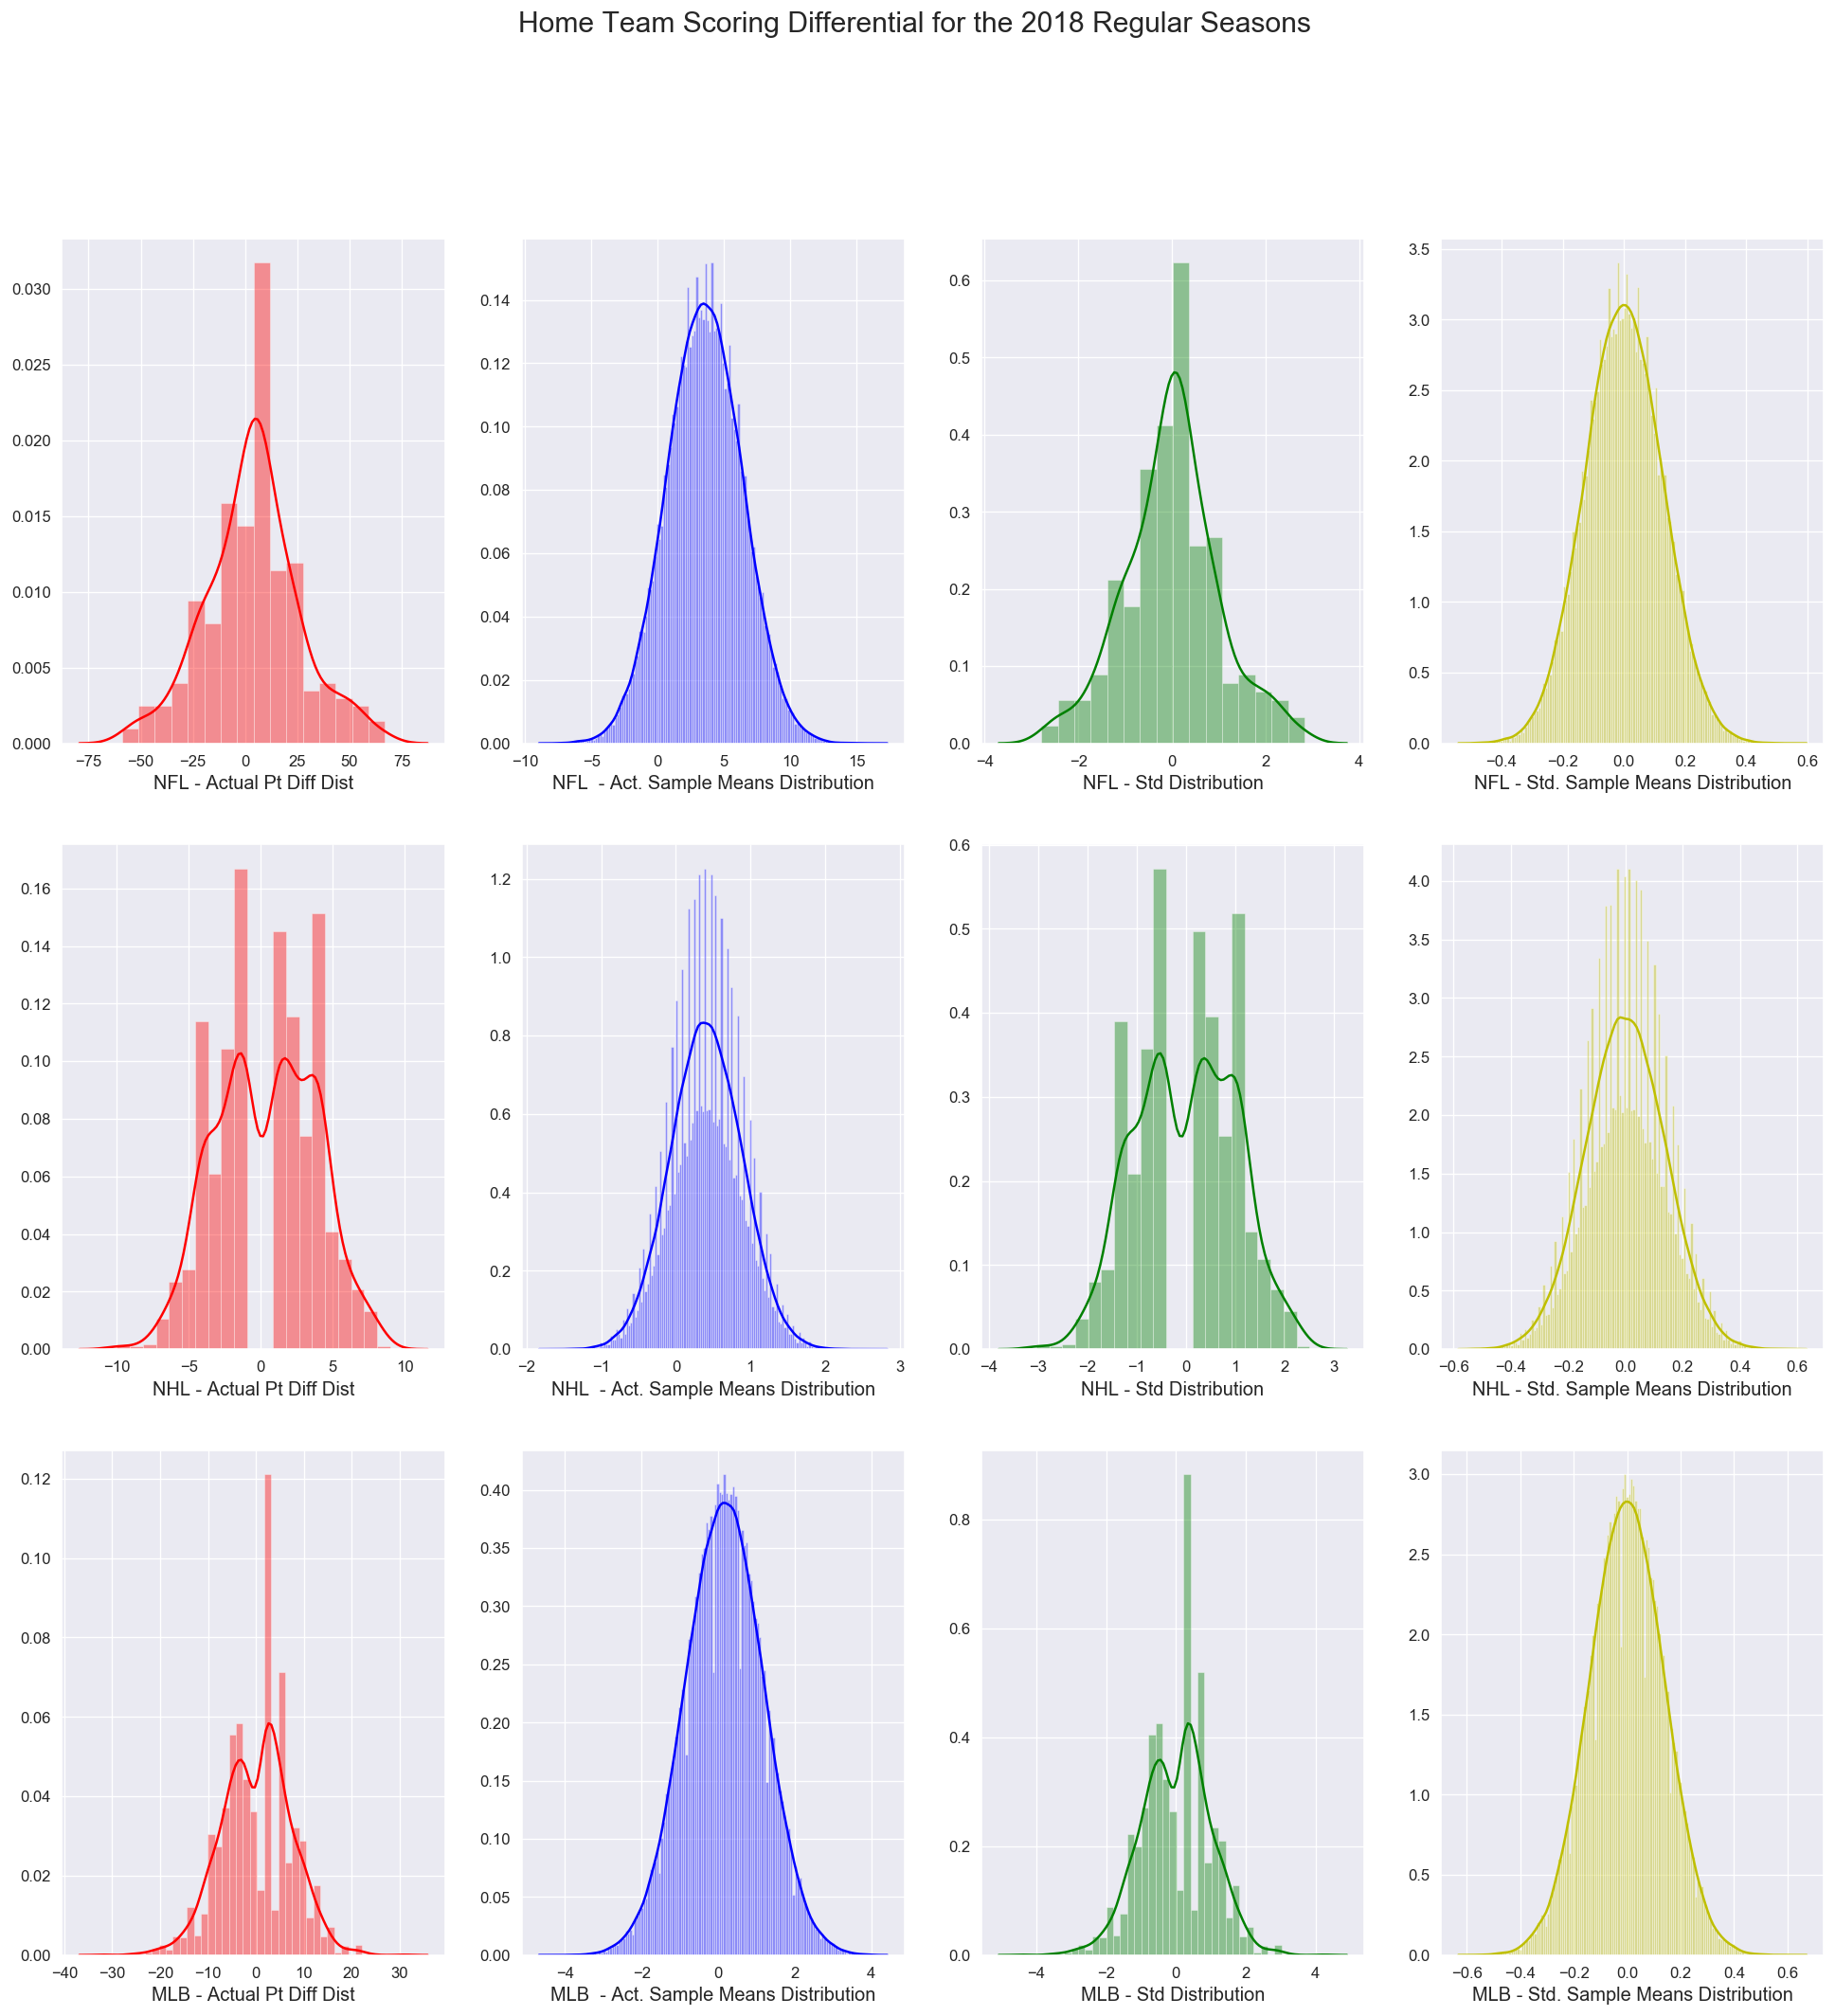

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,20), sharex=False, sharey=False, dpi=120)
fig.suptitle('Home Team Scoring Differential for the 2018 Regular Seasons', fontsize=18)

#football: actual / actual_sample_means / standard / standard_sample_means
sns.distplot(nfl_actuals,
             bins='auto',
             color='r',
             ax=axes[0][0],
             axlabel = 'NFL - Actual Pt Diff Dist'
            );

sns.distplot(nfl_actuals_sample_means,
             bins='auto',
             color='b',
             ax=axes[0][1],
             axlabel = 'NFL  - Act. Sample Means Distribution'
            );

sns.distplot(nfl_zscores,
             bins='auto',
             color='g',
             ax=axes[0][2],
             axlabel = 'NFL - Std Distribution'
            );

sns.distplot(nfl_zscores_sample_means,
             bins='auto',
             color='y',
             ax=axes[0][3],
             axlabel = 'NFL - Std. Sample Means Distribution'
            );

#hockey: actual / actual_sample_means / standard / standard_sample_means
sns.distplot(nhl_actuals,
             bins='auto',
             color='r',
             ax=axes[1][0],
             axlabel = 'NHL - Actual Pt Diff Dist'
            );

sns.distplot(nhl_actuals_sample_means,
             bins='auto',
             color='b',
             ax=axes[1][1],
             axlabel = 'NHL  - Act. Sample Means Distribution'
            );

sns.distplot(nhl_zscores,
             bins='auto',
             color='g',
             ax=axes[1][2],
             axlabel = 'NHL - Std Distribution'
            );

sns.distplot(nhl_zscores_sample_means,
             bins='auto',
             color='y',
             ax=axes[1][3],
             axlabel = 'NHL - Std. Sample Means Distribution'
            );

#baseball: actual / actual_sample_means / standard / standard_sample_means
sns.distplot(mlb_actuals,
             bins='auto',
             color='r',
             ax=axes[2][0],
             axlabel = 'MLB - Actual Pt Diff Dist'
            );

sns.distplot(mlb_actuals_sample_means,
             bins='auto',
             color='b',
             ax=axes[2][1],
             axlabel = 'MLB  - Act. Sample Means Distribution'
            );

sns.distplot(mlb_zscores,
             bins='auto',
             color='g',
             ax=axes[2][2],
             axlabel = 'MLB - Std Distribution'
            );

sns.distplot(mlb_zscores_sample_means,
             bins='auto',
             color='y',
             ax=axes[2][3],
             axlabel = 'MLB - Std. Sample Means Distribution'
            );

In [22]:
cursor.close()
cnx.close()

In [1]:
mlb_actuals_sample_means

NameError: name 'mlb_actuals_sample_means' is not defined